In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")

In [3]:
## file = "https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-02-car-price/data.csv"
## wget $file

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [6]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [7]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [8]:
string_list = list(df.dtypes[df.dtypes == "object"].index)
string_list

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [9]:
for col in string_list:
    df[col] = df[col].str.lower().str.replace(" ", "_")

## Explanatory data analysis

In [10]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

Distribution of Price

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

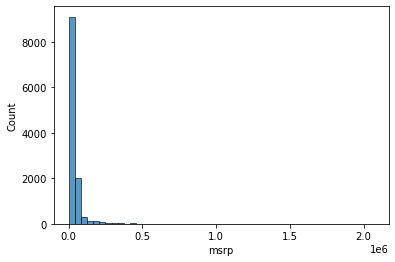

In [12]:
sns.histplot(df.msrp , bins=50)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

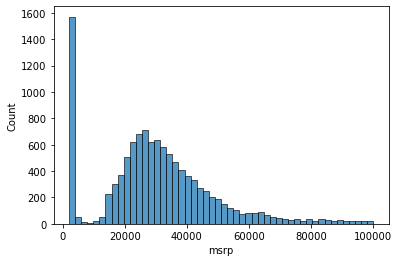

In [13]:
sns.histplot(df.msrp[df.msrp < 100000] , bins=50)

In [14]:
price_logs = np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

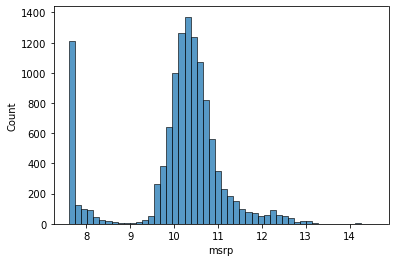

In [15]:
sns.histplot(price_logs , bins=50)

In [16]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Settling the validation network

In [17]:
n = len(df)

n_val= int(n*0.2)
n_test= int(n*0.2)
n_train = n-n_val-n_test

In [18]:

n_train, n_val, n_test

(7150, 2382, 2382)

In [19]:
##create index to help in shuffing
idx = np.arange(n)

In [20]:
np.random.seed(2)
np.random.shuffle(idx)

In [21]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [22]:
df_train.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [23]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [24]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [26]:
del df_train["msrp"]
del df_val["msrp"]
del df_test["msrp"]

## Linear Regression

In [27]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [28]:
xi = [453, 11, 86]

In [29]:
##initial was w0=0, w= [0,0, 0]

w0 = 7.17
w = [0.01,0.04, 0.002]

In [30]:
def linear_regression(xi):
    n= len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
    
    return pred

In [31]:
linear_regression(xi)

12.312

In [32]:
### undoing the np.log

np.expm1(12.312)

222347.2221101062

 ## Linear regression vector form

In [33]:
def dot(xi,w):
    n= len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [34]:
def linear_regression(xi):    
    return w0 + dot(xi,w)

In [35]:
w_new = [w0] + w

In [36]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [37]:
def linear_regression(xi): 
    xi = [1]+xi
    return dot(xi,w_new)

In [38]:
linear_regression(xi)

12.312

In [39]:
w0 = 7.17
w = [0.01,0.04, 0.002]

w_new = [w0] + w                                                                                                                                                                                                                                                              

In [40]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031] 
x10 = [1, 453, 11, 86]

X=[x1,x2, x10]
X=np.array(X)
X


array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [41]:
##confirm
### w_new = w0 + W ==> [1...w1..w2]

X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [42]:
def linear_regression(X):
    return X.dot(w_new)

In [43]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

# Training a Machine Learning Model --Weights

In [44]:
def train_linear_regression(X,y):
    pass

In [45]:
X=[
    [148,24,1385],
    [132,25,2031],
    [453,11, 86],
    [158,24,185],
    [172,25,201],
    [413,11,86],
    [38, 54,185],
    [142,25,431],
    [453,31,86]
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [46]:
y = [10000,20000,15000,20050,10000,20000,15000,25000,12000]

In [47]:
### The below syntax means Transpose(X) * X
### Also known as the gram matrix

XTX = X.T.dot(X)

In [48]:
XTX_inv = np.linalg.inv(XTX)

In [49]:
XTX_inv

array([[ 2.35803616e-06, -1.46900642e-05,  8.00007928e-09],
       [-1.46900642e-05,  2.94487947e-04, -3.84130606e-06],
       [ 8.00007928e-09, -3.84130606e-06,  2.28083884e-07]])

In [50]:
### not exactly identity matrix but very close
XTX.dot(XTX_inv).round(1)

array([[ 1.,  0.,  0.],
       [-0.,  1.,  0.],
       [-0.,  0.,  1.]])

In [51]:
 w = XTX_inv.dot(X.T).dot(y)

In [52]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 26.08419498, 286.12285934,   3.93813107])

In [53]:
w0 = w_full[0]
w = w_full[1:]

In [54]:
w0,w

(26.0841949768029, array([286.12285934,   3.93813107]))

In [55]:
def train_linear_regression(X,y):
    
    ##adding a first column of ones
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    ### The below syntax (X.T)  means Transpose(X) * X
    ### Also known as the gram matrix
    XTX = X.T.dot(X)
    
    ##inverse of matrix
    XTX_inv = np.linalg.inv(XTX)
    
    # (XTX)^-1 * Transpose(X) * y
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [56]:
train_linear_regression(X,y)

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

# 2.8 Car baseline model

In [57]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [58]:
base = ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg", "popularity"]

In [59]:
## df_train[base].isna().sum()
X_train = df_train[base].fillna(0).values

In [60]:
w0,w = train_linear_regression(X_train, y_train)

In [61]:
y_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

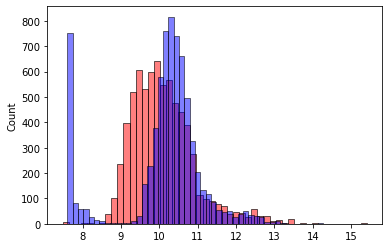

In [62]:
sns.histplot(y_pred, color="red", alpha = 0.5, bins=50)
sns.histplot(y_train, color="blue", alpha = 0.5, bins=50)

# 2.9 RMSE

In [63]:
def rmse(y,y_pred):
    error = y-y_pred
    se = error **2
    mse = se.mean()
    return np.sqrt(mse)

In [64]:
rmse(y_train, y_pred)

0.7554192603920132

# 2.10 Validating the model

In [65]:
base = ["engine_hp", "engine_cylinders", "highway_mpg", 
        "city_mpg", "popularity"]

## df_train[base].isna().sum()
X_train = df_train[base].fillna(0).values

w0,w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [66]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [67]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301594

# 2.11 Simple feature engineering

In [68]:
def prepare_X(df):
    df= df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [69]:
X_train = prepare_X(df_train)

In [70]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058324

<AxesSubplot:ylabel='Count'>

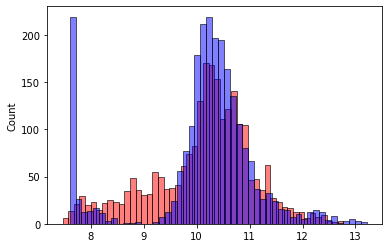

In [71]:
sns.histplot(y_pred, color="red", alpha = 0.5, bins=50)
sns.histplot(y_val, color="blue", alpha = 0.5, bins=50)

# Categorical Variables
Method used here is also known as one hot encoding

In [72]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [73]:
df_train.number_of_doors

0       2.0
1       4.0
2       4.0
3       3.0
4       4.0
       ... 
7145    2.0
7146    2.0
7147    4.0
7148    4.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [74]:
def prepare_X(df):
    df= df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        df["num_doors_%s" % v] = (df.number_of_doors == v).astype("int")
        features.append("num_doors_%s" % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [75]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

In [76]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5157995641503085

In [77]:
makes = list(df.make.value_counts().head().index)

In [78]:
def prepare_X(df):
    df= df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        df["num_doors_%s" % v] = (df.number_of_doors == v).astype("int")
        features.append("num_doors_%s" % v)
        
    for v in makes:
        df["make_%s" % v] = (df.make == v).astype("int")
        features.append("make_%s" % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [79]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5076038849555671

In [80]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [81]:
categorical_variables = [
    "engine_fuel_type", "transmission_type", "driven_wheels" , 
    "market_category", "vehicle_size", "vehicle_style"
    ]

In [82]:
categories = {}

for c in categorical_variables:
    categories[c]=list(df[c].value_counts().head().index)

In [83]:
categories

{'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [84]:
def prepare_X(df):
    df= df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        df["num_doors_%s" % v] = (df.number_of_doors == v).astype("int")
        features.append("num_doors_%s" % v)
        
    for name, values in categories.items():
        for value in values:
            df["%s_%s" % (name,value)] = (df[name] == value).astype("int")
            features.append("%s_%s" % (name,value))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [85]:
for c, v in categories.items():
    print(v)

['regular_unleaded', 'premium_unleaded_(required)', 'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)', 'diesel']
['automatic', 'manual', 'automated_manual', 'direct_drive', 'unknown']
['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']
['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']
['compact', 'midsize', 'large']
['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']


In [86]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
X_train = prepare_X(df_train)
rmse(y_val, y_pred)

31.063208130996834

In [87]:
w0,w

(-431282940925715.25,
 array([ 8.19420068e-02, -2.39456806e+01, -2.28256917e+00, -2.00258340e+00,
        -2.26061132e-03, -1.31520646e+00, -4.91702491e+02, -5.08736557e+02,
        -5.06725511e+02,  5.72181324e+01,  5.60954432e+01,  5.93506052e+01,
         6.08129409e+01,  4.37208192e+01, -5.65557146e+15, -5.65557146e+15,
        -5.65557146e+15, -5.65557146e+15, -5.65557146e+15,  6.08685440e+15,
         6.08685440e+15,  6.08685440e+15,  6.08685440e+15, -5.09646778e+00,
         1.99146152e+00, -3.11066958e-01,  8.46179833e-02,  4.89934518e+00,
        -7.90475264e+00, -9.09046676e+00, -6.63897080e+00, -4.20947357e-02,
         6.21243565e-02,  1.75054074e-01,  3.47266313e-01, -1.66554103e-01]))

# Regularization

In [88]:
##inverse of the matrix is not possible because the last two columns
##are the same.

X= [
   [4,4,4],
   [3,5,5],
   [5,1,1],
   [5,4,4],
   [7,5,5],
   [4,5,5]
   ]

X=np.array(X)

In [89]:
XTX = X.T.dot(X)
XTX

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])


### Add small numbers to the diagonal to help control the out pour of numbers

In [90]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [91]:
XTX = XTX + 0.01 * np.eye(3)

In [92]:
## Inverse now works.

np.linalg.inv(XTX)

array([[ 3.85624712e-02, -1.98159081e-02, -1.98159081e-02],
       [-1.98159081e-02,  5.00124974e+01, -4.99875026e+01],
       [-1.98159081e-02, -4.99875026e+01,  5.00124974e+01]])

In [93]:
def train_linear_regression(X,y, r=0.001):
    
    ##adding a first column of ones
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    ### The below syntax (X.T)  means Transpose(X) * X
    ### Also known as the gram matrix
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    ##inverse of matrix
    XTX_inv = np.linalg.inv(XTX)
    
    # (XTX)^-1 * Transpose(X) * y
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [94]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.45816771252513516

# 2.14 Tuning the model

In [95]:
for r in [0, 0.00001,0.0001, 0.001, 0.01,1,10]:
    X_train = prepare_X(df_train)
    w0,w = train_linear_regression(X_train, y_train,r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    
    print(r,w0,score)

0 -431282940925715.25 31.063208130996834
1e-05 10.533660830528108 0.4581636910049623
0.0001 6.315457052282124 0.45816372784552917
0.001 6.297768181905975 0.45816408594941016
0.01 6.288895834517403 0.45816771252513516
1 5.64919463404345 0.45876250992482953
10 4.302063523805343 0.47092139444156456


In [96]:
r=0.001
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train, y_train,r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
score

0.45816408594941016

# 2.15 Using the model

In [97]:
## Doing a full train using both traing and valididation dataset
df_full_train = pd.concat([df_train, df_val])

In [98]:
df_full_train = df_full_train.reset_index(drop=True)

In [99]:
X_full_train = prepare_X(df_full_train)

In [100]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [101]:
y_full_train = np.concatenate([y_train, y_val])

In [102]:
w0,w = train_linear_regression(X_full_train, y_full_train, r=0.01)

In [103]:
w0

6.32000784458573

In [104]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
score

0.4543003060670189

In [105]:
##score is very close to when we used only training data set which
## mean our data set generalized very well to new data\

score

0.4543003060670189

In [106]:
car = df_test.iloc[20].to_dict()  ## in practise, data usually comes in dict form

In [107]:
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [108]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [109]:
X_small = prepare_X(df_small)


In [110]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]


In [111]:
### car prediction
np.expm1(y_pred)

38571.9402108246

In [112]:
# actual car price

(y_test[20], np.expm1(y_test[20]))

(10.463131911491967, 35000.00000000001)

## Homework - Self learning

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [114]:
### california data from scikit learn
import sklearn

In [115]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [116]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [117]:
house_df = california_housing.frame

In [118]:
type(house_df)

pandas.core.frame.DataFrame

In [119]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

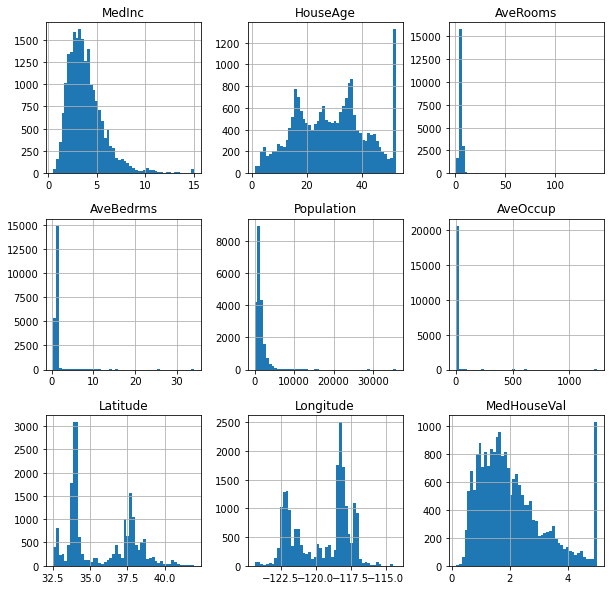

In [120]:
house_df.hist(bins=50, figsize = (10,10))